In [282]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [283]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [284]:
df = pd.read_csv("data.csv")

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Давайте посмотрим, какое количество пропусков мы имеем в нашем датасете

In [286]:
df.isna().sum().sum()

0

Давайте посмотрим, какой процент компаний обанкротился

In [287]:
df["Bankrupt?"].sum()

220

In [288]:
print((df["Bankrupt?"].sum()/df["Bankrupt?"].count())*100)

3.2262795131250916


Давайте построим матрицу корреляций переменных для того, чтобы понять, есть ли в переменных мультиколлинеарность. Мультиколлинеарность может привести к переобучению модели.

In [289]:
corrtable = df.corr()

In [290]:
corrtable[corrtable>0.5].count().sort_values(ascending= False)

 ROA(C) before interest and depreciation before interest    14
 ROA(B) before interest and depreciation after tax          13
 ROA(A) before interest and % after tax                     13
 Operating Profit Per Share (Yuan ¥)                        12
 Per Share Net profit before tax (Yuan ¥)                   12
                                                            ..
 Total debt/Total net worth                                  1
 Interest Expense Ratio                                      1
 Quick Ratio                                                 1
Bankrupt?                                                    1
 Net Income Flag                                             0
Length: 96, dtype: int64

Давайте разделим исходную выборку на трейн и тест

In [291]:
from sklearn.model_selection import train_test_split

In [292]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Bankrupt?', axis = 1), df["Bankrupt?"], test_size=0.3, random_state=42)

In [293]:
X_train.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
5632,0.500951,0.584169,0.553777,0.600614,0.600549,0.999025,0.797528,0.809438,0.303650,0.781627,...,0.820175,0.002280,0.625785,0.600611,0.841847,0.278811,0.026855,0.565445,1,0.033673
903,0.479647,0.523932,0.530007,0.609666,0.609666,0.998971,0.797330,0.809240,0.303417,0.781504,...,0.789320,0.001707,0.623430,0.609661,0.839409,0.281799,0.025910,0.539820,1,0.023831
2666,0.516502,0.580953,0.568714,0.610682,0.610682,0.999128,0.797571,0.809469,0.303510,0.781720,...,0.826516,0.000909,0.624479,0.610681,0.841642,0.275619,0.026792,0.565164,1,0.113503
109,0.446302,0.531509,0.499545,0.595771,0.595771,0.998895,0.797324,0.809286,0.303565,0.781420,...,0.794111,0.015785,0.623716,0.595770,0.839915,0.277858,0.026101,0.555682,1,0.040701
5316,0.501194,0.560565,0.547781,0.600001,0.600001,0.999034,0.797440,0.809349,0.303477,0.781613,...,0.811586,0.002546,0.624576,0.600001,0.841244,0.279156,0.026794,0.565173,1,0.031863


Давайте посмотрим, в каких диапазонах распределены признаки. Возможно, нам нужно нормализовать фичи.

In [294]:
X_train_distributions = X_train.describe()
X_train_distributions

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,...,4773.000000,4.773000e+03,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.0,4773.000000
mean,0.506072,0.559507,0.554408,0.607956,0.607942,0.998876,0.797271,0.809140,0.303511,0.781463,...,0.808175,1.739661e+07,0.623928,0.607955,0.840376,0.280297,0.027675,0.565311,1.0,0.048156
std,0.061579,0.066240,0.062335,0.016953,0.016937,0.005698,0.010144,0.012400,0.008725,0.010065,...,0.041235,3.765608e+08,0.014025,0.016953,0.015853,0.011386,0.018473,0.012998,0.0,0.052477
min,0.000000,0.006923,0.000000,0.000000,0.000000,0.612132,0.160516,0.000000,0.000000,0.133479,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.133503,0.000000,0.000000,1.0,0.000000
25%,0.476820,0.536143,0.527544,0.600492,0.600499,0.998971,0.797387,0.809313,0.303466,0.781568,...,0.797064,9.110040e-04,0.623640,0.600492,0.840138,0.276928,0.026791,0.565158,1.0,0.024575
50%,0.503778,0.560674,0.553188,0.606055,0.606055,0.999024,0.797466,0.809378,0.303525,0.781637,...,0.810959,2.100891e-03,0.623878,0.606052,0.841202,0.278752,0.026809,0.565256,1.0,0.033942
75%,0.536684,0.590166,0.584988,0.613867,0.613824,0.999097,0.797580,0.809471,0.303587,0.781738,...,0.827049,5.242171e-03,0.624185,0.613863,0.842371,0.281417,0.026914,0.565732,1.0,0.053210
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.999778,1.000000,1.000000,0.730252,1.000000,...,0.982879,9.820000e+09,1.000000,1.000000,1.000000,0.745352,1.000000,0.736985,1.0,1.000000


In [295]:
X_train_distributions[X_train_distributions>1].count().sort_values(ascending= False) > 1

 Total Asset Growth Rate                                     True
 Cash Turnover Rate                                          True
 Research and development expense rate                       True
 Inventory Turnover Rate (times)                             True
 Quick Asset Turnover Rate                                   True
                                                            ...  
 Current Liabilities/Liability                              False
 Working Capital/Equity                                     False
 Current Liabilities/Equity                                 False
 Retained Earnings to Total Assets                          False
 ROA(C) before interest and depreciation before interest    False
Length: 95, dtype: bool

Как мы можем видеть из таблицы сверху, некоторые данные принадлежать промежутку [0,1], в то время как другие сильно больше единицы. Давайте нормализуем данные, чтобы в дальнейшем мы могли правильно интерпретировать коэффициенты.

In [296]:
from sklearn.preprocessing import MinMaxScaler

In [297]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [298]:
X_train

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.500951,0.581270,0.553777,0.600614,0.600549,0.998058,0.758814,0.809438,0.415816,0.747989,...,0.834461,2.321818e-13,0.625785,0.600611,0.841847,0.237490,0.026855,0.767241,0.0,0.033673
1,0.479647,0.520613,0.530007,0.609666,0.609666,0.997919,0.758578,0.809240,0.415496,0.747847,...,0.803069,1.738163e-13,0.623430,0.609661,0.839409,0.242374,0.025910,0.732471,0.0,0.023831
2,0.516502,0.578032,0.568714,0.610682,0.610682,0.998323,0.758865,0.809469,0.415623,0.748097,...,0.840913,9.259198e-14,0.624479,0.610681,0.841642,0.232273,0.026792,0.766859,0.0,0.113503
3,0.446302,0.528243,0.499545,0.595771,0.595771,0.997723,0.758571,0.809286,0.415698,0.747749,...,0.807943,1.607411e-12,0.623716,0.595770,0.839915,0.235933,0.026101,0.753994,0.0,0.040701
4,0.501194,0.557501,0.547781,0.600001,0.600001,0.998082,0.758709,0.809349,0.415578,0.747972,...,0.825723,2.592377e-13,0.624576,0.600001,0.841244,0.238055,0.026794,0.766872,0.0,0.031863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4768,0.542729,0.598342,0.583597,0.598236,0.598229,0.998030,0.758779,0.809394,0.415775,0.748026,...,0.851075,1.644142e-12,0.624788,0.598231,0.842331,0.233233,0.026800,0.766906,0.0,0.073707
4769,0.550870,0.617500,0.610793,0.610422,0.610228,0.998256,0.758844,0.809468,0.415656,0.748117,...,0.858376,1.093604e-13,0.624009,0.610419,0.843046,0.234762,0.026820,0.767035,0.0,0.049579
4770,0.507288,0.559148,0.556989,0.605529,0.605371,0.998080,0.758700,0.809354,0.415563,0.747976,...,0.827259,1.215807e-13,0.623880,0.605529,0.841427,0.238969,0.026945,0.767723,0.0,0.029459
4771,0.581339,0.641928,0.633706,0.617247,0.617247,0.998326,0.758977,0.809550,0.415845,0.748219,...,0.870617,8.204814e-14,0.623856,0.617243,0.843619,0.234033,0.026800,0.766908,0.0,0.058283


Давайте проверим, что все фичи нормализованы верно

In [299]:
X_train_distributions = X_train.describe()
X_train_distributions

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,...,4773.000000,4.773000e+03,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.0,4773.000000
mean,0.506072,0.556436,0.554408,0.607956,0.607942,0.997674,0.758507,0.809140,0.415625,0.747800,...,0.822253,1.771548e-03,0.623928,0.607955,0.840376,0.239919,0.027675,0.767059,0.0,0.048156
std,0.061579,0.066701,0.062335,0.016953,0.016937,0.014700,0.012083,0.012400,0.011948,0.011615,...,0.041953,3.834631e-02,0.014025,0.016953,0.015853,0.018610,0.018473,0.017637,0.0,0.052477
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.476820,0.532909,0.527544,0.600492,0.600499,0.997919,0.758645,0.809313,0.415563,0.747921,...,0.810948,9.277027e-14,0.623640,0.600492,0.840138,0.234413,0.026791,0.766852,0.0,0.024575
50%,0.503778,0.557611,0.553188,0.606055,0.606055,0.998055,0.758739,0.809378,0.415644,0.748000,...,0.825085,2.139400e-13,0.623878,0.606052,0.841202,0.237394,0.026809,0.766984,0.0,0.033942
75%,0.536684,0.587309,0.584988,0.613867,0.613824,0.998244,0.758876,0.809471,0.415729,0.748117,...,0.841455,5.338260e-13,0.624185,0.613863,0.842371,0.241749,0.026914,0.767630,0.0,0.053210
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [300]:
X_train_distributions[X_train_distributions>1].count().sort_values(ascending= False) > 1

 Operating Profit Rate                                       True
 Equity to Liability                                        False
 Interest Expense Ratio                                     False
 After-tax Net Profit Growth Rate                           False
 Regular Net Profit Growth Rate                             False
                                                            ...  
 Current Liabilities/Equity                                 False
 Long-term Liability to Current Assets                      False
 Retained Earnings to Total Assets                          False
 Total income/Total expense                                 False
 ROA(C) before interest and depreciation before interest    False
Length: 95, dtype: bool

Теперь давайте также нормализуем фичи и на X_test

In [301]:
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

Используем линейную классификацию для того, чтобы оценить важность коэффициентов в регрессии.

In [302]:
from sklearn.linear_model import LogisticRegression

In [303]:
clf = LogisticRegression(solver='liblinear')


clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [304]:
coef_dict = {}
for coef, feat in zip(clf.coef_[0,:],X_train.columns):
    coef_dict[feat] = coef

print(coef_dict)

{' ROA(C) before interest and depreciation before interest': -2.13354928831987, ' ROA(A) before interest and % after tax': -2.630017514603993, ' ROA(B) before interest and depreciation after tax': -2.4387514800129937, ' Operating Gross Margin': 0.09270834938799787, ' Realized Sales Gross Margin': 0.09970858285629708, ' Operating Profit Rate': 0.5729152132587575, ' Pre-tax net Interest Rate': 0.37874987712939334, ' After-tax net Interest Rate': 0.38943202792229226, ' Non-industry income and expenditure/revenue': 0.12454355140872483, ' Continuous interest rate (after tax)': 0.36024737692538267, ' Operating Expense Rate': 0.19593689347964635, ' Research and development expense rate': 0.09343093177540834, ' Cash flow rate': 0.05298855873264784, ' Interest-bearing debt interest rate': -0.31697614770895466, ' Tax rate (A)': -1.443564548110651, ' Net Value Per Share (B)': -0.8877795804241307, ' Net Value Per Share (A)': -0.8800239461194563, ' Net Value Per Share (C)': -0.8615906480056961, ' P

In [305]:
# sns.set(rc={'figure.figsize':(200,100)})
# sns.set(font_scale=5)

# sns.barplot(x=X_train.columns, y=(clf.coef_).ravel())

In [306]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

In [307]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [308]:
print(conf_matrix)

[[1944   24]
 [  56   22]]


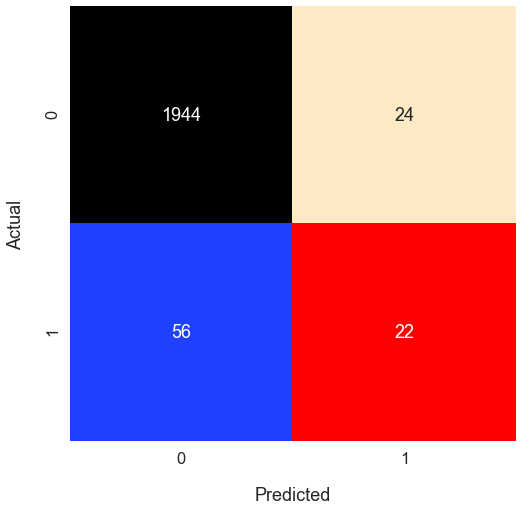

In [309]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array 
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

Давайте также найдем полноту

In [310]:
recall_score(y_true=y_test,y_pred=y_pred)

0.28205128205128205

In [311]:
accuracy_score(y_true=y_test, y_pred= y_pred)

0.9608993157380255

Теперь давайте обучим модель с помощью метода опорных векторов.

In [321]:
clf = SVC(kernel="linear")

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [322]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [323]:
print(conf_matrix)

[[1968    0]
 [  76    2]]


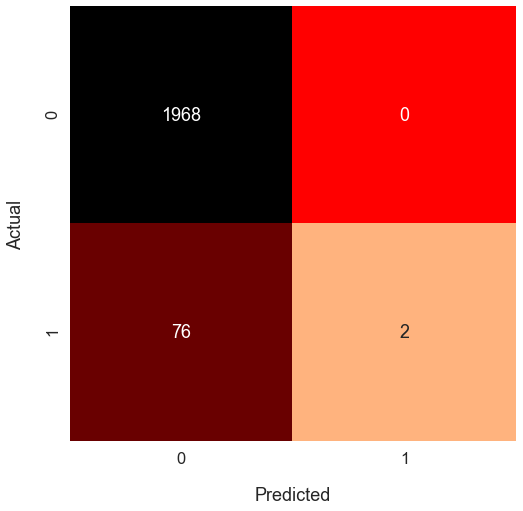

In [324]:
plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array 
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

In [325]:
accuracy_score(y_true=y_test, y_pred= y_pred)

0.9628543499511242

In [326]:
recall_score(y_true=y_test,y_pred=y_pred)

0.02564102564102564

Как мы можем видеть, качество модели немного выросло

In [331]:
clf.coef_

array([[ 2.13490960e-03,  8.91353016e-02, -3.66767255e-02,
         4.07776251e-02,  3.92634268e-02,  7.20375411e-02,
         5.92089567e-02,  1.80746224e-02,  3.89287236e-02,
        -1.08635215e-02,  6.68383634e-03,  2.36085268e-03,
        -2.52505195e-02,  5.21660627e-03,  4.56884637e-03,
        -5.76844530e-02, -5.35364860e-02, -3.36966817e-02,
        -1.52561732e-01,  2.27888296e-02, -2.59500367e-01,
         1.62242237e-01,  1.01271823e-01,  5.00821539e-03,
        -5.25663652e-03,  4.66790963e-04,  5.06079859e-03,
         3.50070204e-02, -3.04035000e-03, -2.50964032e-01,
        -1.38888497e-02,  2.20143735e-01, -1.37539120e-01,
         3.58415754e-03, -2.01772400e-02,  1.24320859e-01,
        -1.16437792e-02,  1.16437792e-02, -8.05812018e-02,
         2.67972646e-01, -1.99409889e-01,  1.54744497e-01,
        -7.79559564e-02,  1.15332483e-01,  9.59988979e-02,
        -6.08738671e-02, -3.42417396e-02, -2.21333827e-03,
         7.19111709e-03, -5.47553932e-01,  2.81226280e-0

In [332]:
coef_dict = {}
for coef, feat in zip(clf.coef_[0,:],X_train.columns):
    coef_dict[feat] = coef

print(coef_dict)

{' ROA(C) before interest and depreciation before interest': 0.0021349096020060188, ' ROA(A) before interest and % after tax': 0.08913530162163852, ' ROA(B) before interest and depreciation after tax': -0.03667672547720713, ' Operating Gross Margin': 0.04077762506702243, ' Realized Sales Gross Margin': 0.03926342677878836, ' Operating Profit Rate': 0.07203754111300498, ' Pre-tax net Interest Rate': 0.059208956695393056, ' After-tax net Interest Rate': 0.018074622391353046, ' Non-industry income and expenditure/revenue': 0.03892872359504196, ' Continuous interest rate (after tax)': -0.010863521450232838, ' Operating Expense Rate': 0.006683836338046589, ' Research and development expense rate': 0.002360852678494396, ' Cash flow rate': -0.025250519481524236, ' Interest-bearing debt interest rate': 0.0052166062749786635, ' Tax rate (A)': 0.00456884637413113, ' Net Value Per Share (B)': -0.05768445295846725, ' Net Value Per Share (A)': -0.05353648600583405, ' Net Value Per Share (C)': -0.03

Теперь давайте посмотрим, переобучилась ли наша выборка.

In [333]:
y_train_pred = clf.predict(X_train)

In [334]:
accuracy_score(y_true=y_train, y_pred= y_train_pred)

0.9710873664362036

Как мы видим выше, да, модель переобучилась.